In [48]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline
sns.set()

In [49]:
data = loadmat('ex5data1.mat')
x = np.c_[np.ones((12, 1)), data['X']]
y = data['y']
xval = data['Xval']
yval = data['yval']
xtest = data['Xtest']
ytest = data['ytest']
m = y.shape[0]

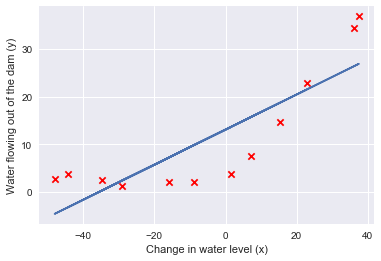

In [70]:
plt.scatter(x[:, 1:], y, s = 40, c = 'r', marker = 'x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

In [51]:
def regularizedCostFunction (theta, x, y, λ = 1):
    theta = np.array(theta).reshape(1, -1)
    h = np.dot(x, theta.T)
    j = 1 / (2 * m) * np.sum(np.square(h - y)) + λ / (2 * m) * np.square(theta[:, 1:])
    return j

In [52]:
def regularizedGradient (theta, x, y, λ = 1):
    theta = np.array(theta).reshape(1, -1)
    h = np.dot(x, theta.T)
    partialDerivative = (1 / m) * np.dot(x.T, (h - y)) + (λ / (2 * m) * theta[:, 1:])
    return partialDerivative.flatten()

In [54]:
initialTheta = [1, 1]
optimum = sc.optimize.minimize(regularizedCostFunction, initialTheta, args = (x, y, 0), method = 'CG', jac = regularizedGradient, options={'maxiter' : 200})
optimum.x

array([ 13.08790734,   0.36777925])

In [ ]:
plt.scatter(x[:, 1:], y, s = 40, c = 'r', marker = 'x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(x[:, 1:], x.dot(optimum.x))